In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

In [ ]:
df = pd.read_csv('/content/final_cleaned_filtered_female_crime.csv')
df.head()

/usr/local/lib/python3.12/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed,Latitude,Longitude,hour_of_day,is_night,severity_score,safety_label
0,3,01-02-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,Kidnapping,48,F,Blunt Object,Other Crime,15,No,NaN,30.909016,75.851601,14,0,5,Unsafe
1,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,Burglary,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00,18.521374,73.854507,14,0,2,Safe
2,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,Vandalism,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00,18.521374,73.854507,16,0,2,Safe
3,7,01-01-2020 16:00,01-01-2020 06:00,01-01-2020 14:08,Chennai,172,Vehicle - Stolen,64,F,Knife,Violent Crime,13,Yes,24-03-2020 16:00,13.083694,80.270186,14,0,2,Safe
4,13,01-01-2020 16:00,01-01-2020 12:00,01-01-2020 23:14,Visakhapatnam,498,Fraud,36,F,Poison,Other Crime,3,Yes,29-02-2020 16:00,17.693553,83.292130,23,1,2,Unsafe


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22423 entries, 0 to 22422
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Report Number       22423 non-null  int64  
 1   Date Reported       22423 non-null  object 
 2   Date of Occurrence  22423 non-null  object 
 3   Time of Occurrence  22423 non-null  object 
 4   City                22423 non-null  object 
 5   Crime Code          22423 non-null  int64  
 6   Crime Description   22423 non-null  object 
 7   Victim Age          22423 non-null  int64  
 8   Victim Gender       22423 non-null  object 
 9   Weapon Used         22423 non-null  object 
 10  Crime Domain        22423 non-null  object 
 11  Police Deployed     22423 non-null  int64  
 12  Case Closed         22423 non-null  object 
 13  Date Case Closed    11216 non-null  object 
 14  Latitude            22423 non-null  float64
 15  Longitude           22423 non-null  float64
 16  hour

In [ ]:
df.describe()

,Report Number,Crime Code,Victim Age,Police Deployed,Latitude,Longitude,hour_of_day,is_night,severity_score
count,22423.000000,22423.000000,22423.000000,22423.000000,22423.000000,22423.000000,22423.000000,22423.000000,22423.000000
mean,19579.742853,348.667440,44.268474,10.019979,21.772435,77.464315,11.432458,0.413772,2.236810
std,12489.657484,144.498149,20.160961,5.471446,5.424954,4.114286,6.890246,0.492520,0.910658
min,3.000000,100.000000,10.000000,1.000000,12.976794,70.802838,0.000000,0.000000,1.000000
25%,8455.500000,224.000000,27.000000,5.000000,18.521374,73.854507,5.000000,0.000000,2.000000
50%,17434.000000,348.000000,44.000000,10.000000,21.209489,77.219771,11.000000,0.000000,2.000000
75%,31767.000000,473.000000,62.000000,15.000000,26.915458,79.082056,17.000000,1.000000,2.000000
max,40160.000000,599.000000,79.000000,19.000000,34.074744,88.363895,23.000000,1.000000,5.000000


In [ ]:
df.isnull().sum()

,0
Report Number,0
Date Reported,0
Date of Occurrence,0
Time of Occurrence,0
City,0
Crime Code,0
Crime Description,0
Victim Age,0
Victim Gender,0
Weapon Used,0


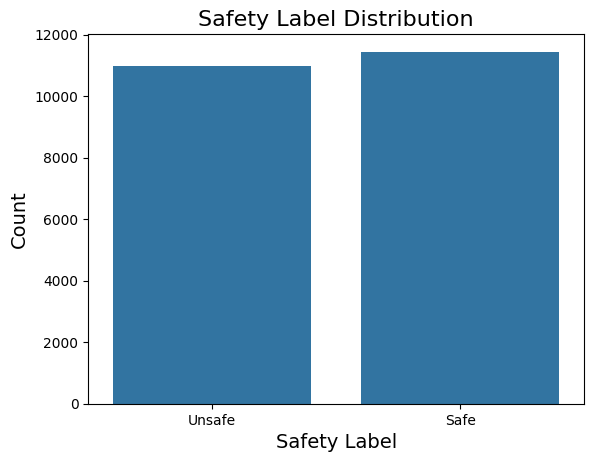

safety_label
Safe      11445
Unsafe    10978
Name: count, dtype: int64


In [ ]:
sns.countplot(x='safety_label', data=df)
plt.title('Safety Label Distribution', fontsize=16)
plt.xlabel('Safety Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

print(df['safety_label'].value_counts())

In [ ]:
#convert date column to datetime
df['Date Reported'] = pd.to_datetime(df['Date Reported'], errors='coerce')
df['Date of Occurrence'] = pd.to_datetime(df['Date of Occurrence'], errors='coerce')

Step - 2
- Feature Engineering

In [ ]:
#A- Weekend Feature
df['is_weekend'] = df['Date of Occurrence'].dt.dayofweek >= 5

In [ ]:
#B - Month
df['month'] = df['Date of Occurrence'].dt.month

In [ ]:
#C - Week of Year
df['week_of_year'] = df['Date of Occurrence'].dt.isocalendar().week

In [ ]:
#D - Latitude & Longitude Bucketization (FIXED)
df['lat_bucket'] = pd.qcut(df['Latitude'], q=10, labels=False, duplicates='drop')
df['lon_bucket'] = pd.qcut(df['Longitude'], q=10, labels=False, duplicates='drop')

In [ ]:
#E - Crime Keywords --> Binary Features
df['is_rape'] = df['Crime Description'].str.contains('RAPE', case=False, na=False).astype(int)
df['is_assault'] = df['Crime Description'].str.contains('ASSAULT', case=False, na=False).astype(int)
df['is_harass'] = df['Crime Description'].str.contains('HARASS', case=False, na=False).astype(int)

Step - 3
- Drop useless / Leakage Columns

In [ ]:
df = df.drop(['Report Number','Date Reported', 'Date of Occurrence', 'Time of Occurrence', 'Date Case Closed', 'severity_score', 'is_night'], axis=1)

In [ ]:
df.head()

,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Latitude,...,hour_of_day,safety_label,is_weekend,month,week_of_year,lat_bucket,lon_bucket,is_rape,is_assault,is_harass
0,Ludhiana,271,Kidnapping,48,F,Blunt Object,Other Crime,15,No,30.909016,...,14,Unsafe,False,1.0,1,8,2,0,0,0
1,Pune,170,Burglary,49,F,Firearm,Other Crime,1,Yes,18.521374,...,14,Safe,False,1.0,1,2,1,0,0,0
2,Pune,421,Vandalism,30,F,Other,Other Crime,18,Yes,18.521374,...,16,Safe,False,1.0,1,2,1,0,0,0
3,Chennai,172,Vehicle - Stolen,64,F,Knife,Violent Crime,13,Yes,13.083694,...,14,Safe,False,1.0,1,0,5,0,0,0
4,Visakhapatnam,498,Fraud,36,F,Poison,Other Crime,3,Yes,17.693553,...,23,Unsafe,False,1.0,1,2,7,0,0,0


Step - 4
- Encode Target Label

In [ ]:
encoder = LabelEncoder()
df['safety_label'] = encoder.fit_transform(df['safety_label'])

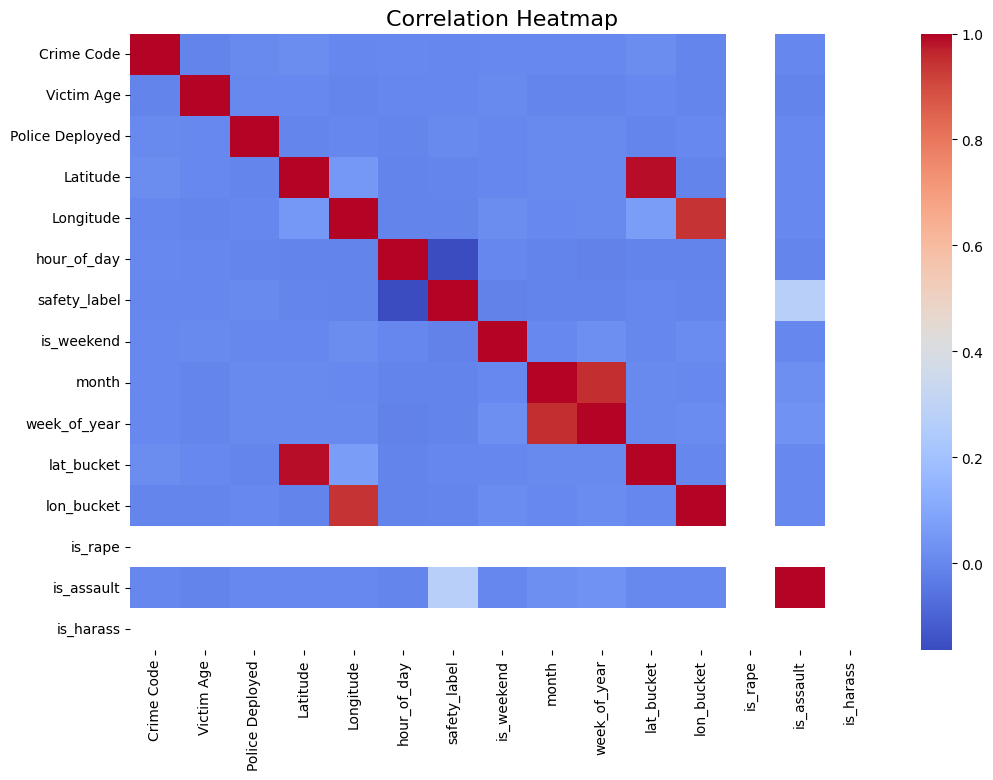

In [ ]:
plt.figure(figsize=(12,8))
c = df.corr(numeric_only = True)
sns.heatmap(c, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

Step - 5
- Features and Target

In [ ]:
X = df.drop('safety_label', axis=1)
y = df['safety_label']

Step - 6
- Numeric & Categorical Features

In [ ]:
from numpy._core import numeric
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = ['City', 'Crime Domain', 'Weapon Used', 'Victim Gender']

Step - 7
- Pipelines for Preprocessing

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

Step - 8
- Final Pipeline (Logistic Regression)

In [ ]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('log_reg', LogisticRegression(
        max_iter=10000,
        class_weight='balanced',
        solver='liblinear',
    ))
])

Step - 9
- Train / Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step - 10
- Hypertest Tuning | Grid Search |

In [ ]:
param_grid = {
    'log_reg__C': [0.1, 1, 10, 100]
}

grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, Y_train)

print(f'Best Parameters: {grid.best_params_}')

Best Parameters: {'log_reg__C': 0.1}


Step - 11
- Final Model Evaluation

In [ ]:
best_model = grid.best_estimator_

Y_pred_train = best_model.predict(X_train)
Y_pred_test = best_model.predict(X_test)

print("\nClassification Regression Result: ")
print('Training Accuracy:', accuracy_score(Y_train, Y_pred_train))
print('Testing Accuracy:', accuracy_score(Y_test, Y_pred_test))


print("\nClassification Report")
print(classification_report(Y_test, Y_pred_test))



Classification Regression Result: 
Training Accuracy: 0.9475972795183409
Testing Accuracy: 0.9435897435897436

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      2283
           1       0.96      0.92      0.94      2202

    accuracy                           0.94      4485
   macro avg       0.94      0.94      0.94      4485
weighted avg       0.94      0.94      0.94      4485



In [ ]:
print("\nData Used Summary: ")
print("Original Test Data: ", len(df))
print("Train Data: ", len(X_train))
print("Test Data: ", len(X_test))


Data Used Summary: 
Original Test Data:  22423
Train Data:  17938
Test Data:  4485


In [ ]:
input_data = {
    # Original categorical features
    "City": "Delhi",
    "Crime Domain": "Public Place",
    "Weapon Used": "Knife",
    "Victim Gender": "Female",

    # Original numeric features
    "Victim Age": 23,
    "Crime Code": 102,
    "Police Deployed": 2,
    "Latitude": 28.7041,
    "Longitude": 77.1025,
    "hour_of_day": 22,   # 10 PM

    # Feature-engineered columns
    "is_weekend": 0,
    "month": 5,
    "week_of_year": 18,
    "lat_bucket": 5,
    "lon_bucket": 4,

    # Crime description keywords
    "is_rape": 0,
    "is_assault": 1,
    "is_harass": 1
}

# Convert to DataFrame
input_df = pd.DataFrame([input_data])

#predict
prediction = best_model.predict(input_df)
prediction_prob = best_model.predict_proba(input_df)

# Output
print("Prediction Output: ", prediction)

if(prediction[0] == 0):
  print("Prediction: ❌Unsafe Area")
else:
  print("Prediction: ✅Safe Area")

print("Probability (Unsafe/Safe): ", prediction_prob)

Prediction Output:  [1]
Prediction: ✅Safe Area
Probability (Unsafe/Safe):  [[7.93792847e-04 9.99206207e-01]]


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


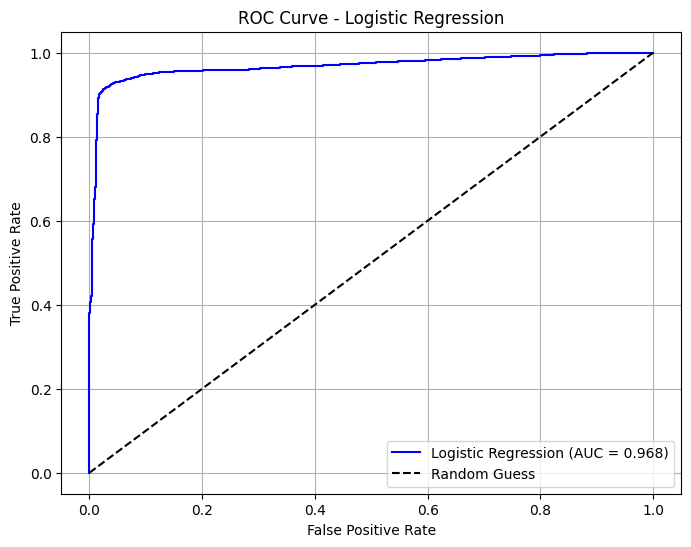

In [ ]:
# =====================================================
# ROC–AUC Curve for LOGISTIC REGRESSION
# =====================================================

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities (positive class = 1)
y_prob_lr = best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr_lr, tpr_lr, _ = roc_curve(Y_test, y_prob_lr)

# Compute AUC
auc_lr = auc(fpr_lr, tpr_lr)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.3f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()
